# Support Vector Machine

In [248]:
import pandas as pd

In [249]:
df = pd.read_csv("C://Users//cictstudent16//Desktop//Shujaat DM-BI//titanic_clean1.csv")

In [250]:
cols = list(df.columns)
print(cols)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Gen_male', 'Survived']


In [251]:
df.shape

(1309, 9)

In [252]:
df.head(10)

,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gen_male,Survived
0,3,22.000000,1,0,7.2500,0,0,1,0
1,1,38.000000,1,0,71.2833,1,1,0,1
2,3,26.000000,0,0,7.9250,0,2,0,1
3,1,35.000000,1,0,53.1000,0,1,0,1
4,3,35.000000,0,0,8.0500,0,0,1,0
5,3,32.252151,0,0,8.4583,2,0,1,0
6,1,54.000000,0,0,51.8625,0,0,1,0
7,3,2.000000,3,1,21.0750,0,1,1,0
8,3,27.000000,0,2,11.1333,0,1,0,1
9,2,14.000000,1,0,30.0708,1,1,0,1


In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

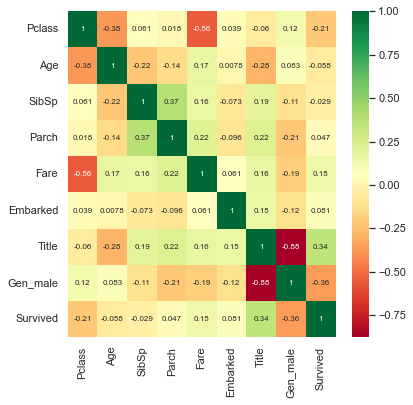

In [254]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn", annot_kws={"fontsize": 8});

In [255]:
features_cols = ['Pclass', 'Age','Fare', 'Embarked', 'Title', 'Gen_male']
print(features_cols)

['Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'Gen_male']


In [256]:
from sklearn.model_selection import train_test_split

In [257]:
#dataframe
X = df[features_cols] #Features
#Series
y = df.Survived #Target variable
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05 ,  random_state = 30)

In [258]:
len(y_train)

1243

# clf

In [259]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()

In [260]:
# Train  Model
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)


In [261]:
from sklearn.svm import SVC # "Support vector classifier"
clf = SVC(kernel='linear', random_state=0)
model = clf.fit(X_train, y_train)

In [262]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [263]:
len(y_pred)

66

In [264]:
len(y_test)

66

In [265]:
y = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})
y.head(20)

,Original,Predicted
659,0,0
338,1,0
610,0,1
950,0,1
290,1,1
649,1,1
902,0,0
619,0,0
756,0,0
1150,0,0


In [266]:
# calculate accuracy
from sklearn import metrics

result = metrics.confusion_matrix(y_test, y_pred);
print("Confusion Matrix:")
print(result)


Confusion Matrix:
[[31  9]
 [ 6 20]]


In [267]:
def plt1():
    import seaborn as sns; sns.set()
    c_mtrx = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx, annot=True, fmt = '.3g')

In [268]:
#[row, column]
#(Actual, Predict)
TP = result[1, 1]      
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

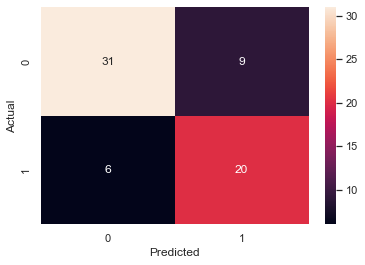

In [269]:
plt1()

In [270]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')


In [271]:
EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy:	 0.7727272727272727
Sensitivity:	 0.7692307692307693
Specificity:	 0.775
Precision:	 0.6896551724137931
Classification Eerror: 0.2272727272727273
False_Positive_Rate: 0.22499999999999998
###########################################


In [272]:
# get total number of 0 in the actual dataset
count0 = df['Survived'][df.Survived==0].count()

# get total number of 0 in the actual dataset
count1 = df['Survived'][df.Survived==1].count()

print("Actual Dataset")
print("0's:", count0)
print("1's:", count1)

Actual Dataset
0's: 759
1's: 550


In [273]:
# get total number of 0 in the training dataset
Trcount0 = y_train[y_train==0].count()

# get total number of 1 in the training dataset
Trcount1 = y_train[y_train==1].count()

# Plotting the bar chart
labels = ['0', '1']
counts = [Trcount0, Trcount1]

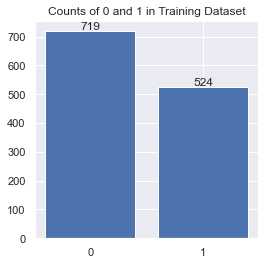

In [274]:
plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Training Dataset')
plt.bar(labels, counts)

# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()